In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

## Load Data

In [61]:
df = pd.read_csv('data/Data_Credit_2023.csv').drop(columns= "Unnamed: 0")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [62]:
print("Shape : ", df.shape)
print('\n')
print("Info : ", df.info())

Shape :  (150000, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076

In [63]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## We investigate late in paiement

In [64]:
df[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate' ]].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,150000.000000,150000.000000,150000.000000
mean,0.421033,0.240387,0.265973
std,4.192781,4.155179,4.169304
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,98.000000,98.000000,98.000000


In [65]:
print("values for range 30-59 days : ", df['NumberOfTime30-59DaysPastDueNotWorse'].unique())
print("values for range 60-89 days : ", df['NumberOfTime60-89DaysPastDueNotWorse'].unique())
print("values for range 90 days : ", df['NumberOfTimes90DaysLate'].unique())

values for range 30-59 days :  [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]
values for range 60-89 days :  [ 0  1  2  5  3 98  4  6  7  8 96 11  9]
values for range 90 days :  [ 0  1  3  2  5  4 98 10  9  6  7  8 15 96 11 13 14 17 12]


In [66]:
# We notice that we always have the following values : 96 and 98, how many individuals are concerned ?

print(df.loc[df["NumberOfTime30-59DaysPastDueNotWorse"] > 90].shape)
print(df.loc[df["NumberOfTime60-89DaysPastDueNotWorse"] > 90].shape)
print(df.loc[df["NumberOfTimes90DaysLate"] > 90].shape)

#We Will replace these valeues by their max
print("Max 30-59days late : ", df["NumberOfTime30-59DaysPastDueNotWorse"].max())
print("Max 60-89days late : ", df["NumberOfTime60-89DaysPastDueNotWorse"].max())
print("Max 90 days late : ", df["NumberOfTimes90DaysLate"].max())

df.loc[df["NumberOfTime30-59DaysPastDueNotWorse"] > 90,"NumberOfTime30-59DaysPastDueNotWorse"] = 13
df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] > 90,'NumberOfTime60-89DaysPastDueNotWorse'] = 11
df.loc[df["NumberOfTimes90DaysLate"] > 90,"NumberOfTimes90DaysLate"] = 17

(269, 11)
(269, 11)
(269, 11)
Max 30-59days late :  98
Max 60-89days late :  98
Max 90 days late :  98


## Investigation of Total balance on Credit Cards and personal lines of Credit

In [67]:
# A ratio > 1 represents a serious defaulter
df["RevolvingUtilizationOfUnsecuredLines"].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [68]:
# Looking at the quantile, we notice outliers. We fix our treshold to 10

df = df[df["RevolvingUtilizationOfUnsecuredLines"] <= 10]
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    149759.000000
mean          0.322758
std           0.366748
min           0.000000
25%           0.029785
50%           0.153542
75%           0.555935
max           8.851852
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

## Looking at the Debt Ratio

In [69]:
df["DebtRatio"].describe()

count    149759.000000
mean        352.652789
std        2038.203228
min           0.000000
25%           0.174960
50%           0.366483
75%           0.866946
max      329664.000000
Name: DebtRatio, dtype: float64

In [70]:
# Looking at the quantile, we notice high increase between 0,8 and 0,825.
df["DebtRatio"].quantile([0.75, 0.8, 0.825, 0.85, 0.9])

0.750       0.866946
0.800       4.000000
0.825      44.000000
0.850     266.300000
0.900    1265.000000
Name: DebtRatio, dtype: float64

In [71]:
# We will thus investigate individuals before the 0.8 quantile treshold
df = df[df["DebtRatio"] < df["DebtRatio"].quantile(0.8)]
df.shape

(119763, 11)

## Looking at the Monthly Income

In [72]:
df["MonthlyIncome"].describe()

count    1.176230e+05
mean     6.799842e+03
std      1.451172e+04
min      0.000000e+00
25%      3.500000e+03
50%      5.483000e+03
75%      8.333000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [73]:
# Looking at the quantile. If they are outliers as suggest by the max in the above cell, they are concentrate on the top of the distriution
df["MonthlyIncome"].quantile([0.75, 0.8, 0.825, 0.85, 0.9, 0.95, 0.97, 0.98, 0.99])

0.750     8333.00
0.800     9166.00
0.825     9750.00
0.850    10200.00
0.900    11700.00
0.950    14700.00
0.970    17100.68
0.980    19800.00
0.990    25000.00
Name: MonthlyIncome, dtype: float64

In [74]:
# check the proportion of defaulter in the top of the distribution. 4% of individuals saw their credits refuses which is less than the total population. We expects that outliers in monthly income if they existt 
# not have a significant impact on the results

df.loc[df["MonthlyIncome"] > df["MonthlyIncome"].quantile(0.99)].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1.161000e+03,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,0.053402,0.305380,53.296296,0.284238,0.157780,5.820645e+04,11.522825,0.067183,2.111111,0.059432,1.325581
std,0.224931,0.356385,11.426831,0.816955,0.169965,1.309513e+05,6.619045,0.590704,2.617690,0.434403,1.372429
min,0.000000,0.000000,25.000000,0.000000,0.000000,2.500100e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.039205,45.000000,0.000000,0.033411,2.940000e+04,7.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.167865,53.000000,0.000000,0.115195,3.536500e+04,10.000000,0.000000,2.000000,0.000000,1.000000
75%,0.000000,0.495386,62.000000,0.000000,0.231778,5.200000e+04,15.000000,0.000000,3.000000,0.000000,2.000000
max,1.000000,5.361137,94.000000,13.000000,1.657792,3.008750e+06,57.000000,17.000000,32.000000,11.000000,7.000000


In [75]:
# It seems that the high wages are not outliers, so we will keep them

Mi_out = df.loc[df["MonthlyIncome"]>1000000]
Mi_out.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,4.0,4.000000,4.000000,4.00,4.000000,4.000000e+00,4.000000,4.0,4.000000,4.0,4.000000
mean,0.0,0.160052,52.000000,0.25,0.003199,1.858852e+06,11.500000,0.0,2.000000,0.0,1.500000
std,0.0,0.219408,11.313708,0.50,0.001369,8.234208e+05,2.645751,0.0,1.414214,0.0,1.290994
min,0.0,0.000000,44.000000,0.00,0.001470,1.072500e+06,9.000000,0.0,1.000000,0.0,0.000000
25%,0.0,0.005496,44.000000,0.00,0.002449,1.438200e+06,9.750000,0.0,1.000000,0.0,0.750000
50%,0.0,0.085592,48.000000,0.00,0.003394,1.677080e+06,11.000000,0.0,1.500000,0.0,1.500000
75%,0.0,0.240148,56.000000,0.25,0.004144,2.097732e+06,12.750000,0.0,2.500000,0.0,2.250000
max,0.0,0.469025,68.000000,1.00,0.004537,3.008750e+06,15.000000,0.0,4.000000,0.0,3.000000


## Handle NAs

In [76]:
# We have reduced our NAs number by our process, but some of them are still there. Thus, We will replace NA in Monthly Income by the median and the NA in Dependents by 0

df["MonthlyIncome"] = df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())
df["NumberOfDependents"] = df["NumberOfDependents"].fillna(0)

## Export

In [77]:
df.to_csv("data/Credit_Risk_clean.csv", ";")

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_29151/1442622841.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_csv except for the argument 'path_or_buf' will be keyword-only.
  df.to_csv("data/Credit_Risk_clean.csv", ";")


## Descriptive Statistics

In [78]:
df_clean = df.copy()

#### Age

In [79]:
age_desc = df_clean["age"].describe().reset_index()
age_desc

,index,age
0,count,119763.000000
1,mean,51.493291
2,std,14.603658
3,min,0.000000
4,25%,41.000000
5,50%,51.000000
6,75%,62.000000
7,max,105.000000


Text(0.5, 1.0, 'Distribution of Age')

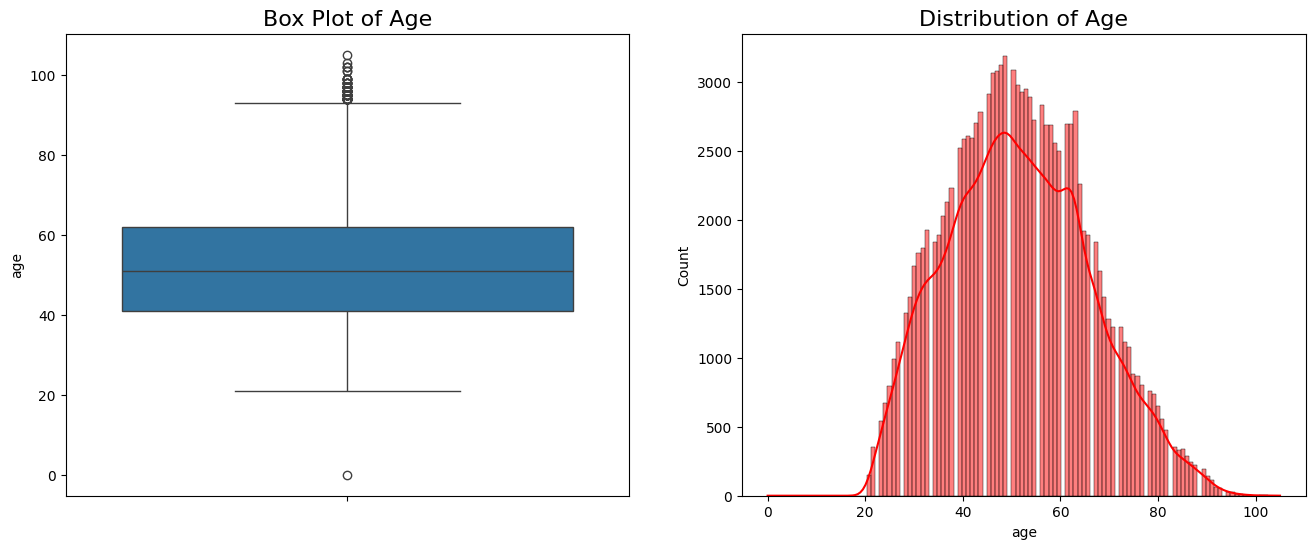

In [80]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['age'], ax = axes[0])
axes[0].set_title('Box Plot of Age', size=16)
sns.histplot(df_clean['age'], kde=True, color='red',ax=axes[1])
axes[1].set_title('Distribution of Age', size=16)

#### RevolvingUtilizationOfUnsecuredLines

In [81]:
RUUL_desc = df_clean["RevolvingUtilizationOfUnsecuredLines"].describe().reset_index()
RUUL_desc

,index,RevolvingUtilizationOfUnsecuredLines
0,count,119763.000000
1,mean,0.334599
2,std,0.366280
3,min,0.000000
4,25%,0.033260
5,50%,0.175082
6,75%,0.582834
7,max,8.851852


Text(0.5, 1.0, 'Distribution of RevolvingUtilizationOfUnsecuredLines')

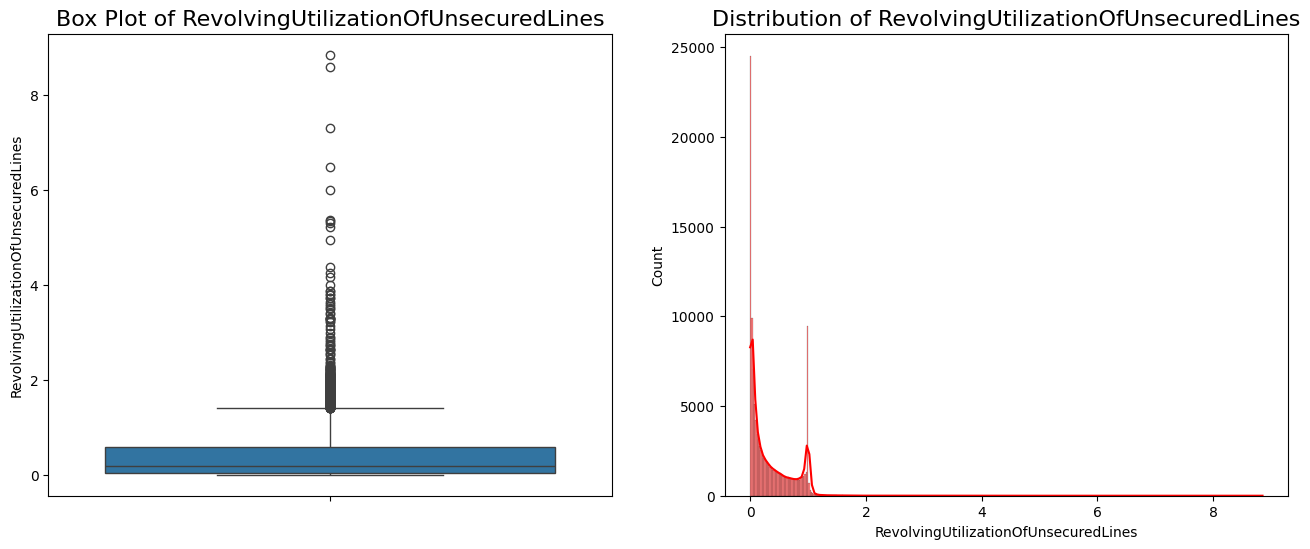

In [82]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['RevolvingUtilizationOfUnsecuredLines'], ax = axes[0])
axes[0].set_title('Box Plot of RevolvingUtilizationOfUnsecuredLines', size=16)
sns.histplot(df_clean['RevolvingUtilizationOfUnsecuredLines'], kde=True, color='red',ax=axes[1])
axes[1].set_title('Distribution of RevolvingUtilizationOfUnsecuredLines', size=16)

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_29151/2509555289.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="RevolvingUtilizationOfUnsecuredLines", hue="SeriousDlqin2yrs", shade=True)


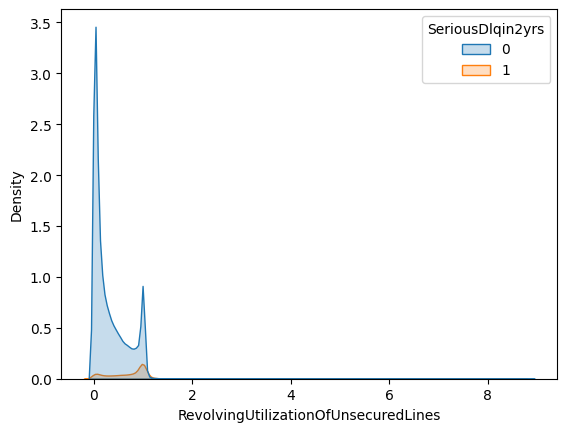

In [93]:
sns.kdeplot(data=df_clean, x="RevolvingUtilizationOfUnsecuredLines", hue="SeriousDlqin2yrs", shade=True)
plt.show()

#### DebtRatio

In [83]:
df_clean["DebtRatio"].describe().reset_index()

,index,DebtRatio
0,count,119763.000000
1,mean,0.358092
2,std,0.368036
3,min,0.000000
4,25%,0.133602
5,50%,0.287329
6,75%,0.467157
7,max,3.994012


Text(0.5, 1.0, 'Distribution of DebtRatio')

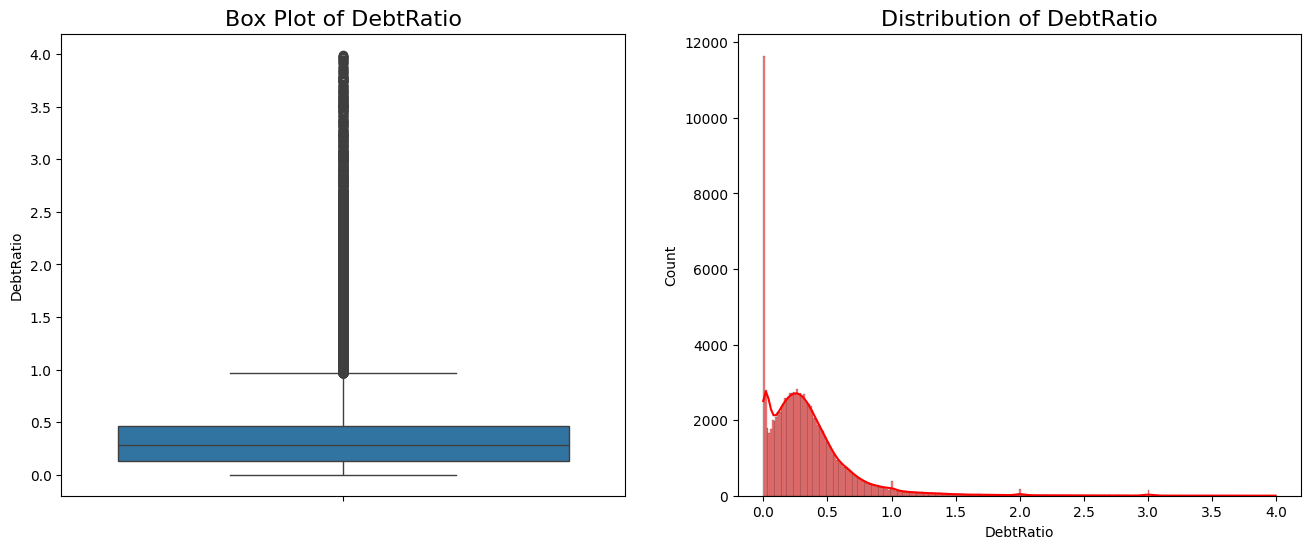

In [84]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['DebtRatio'], ax = axes[0])
axes[0].set_title('Box Plot of DebtRatio', size=16)
sns.histplot(df_clean['DebtRatio'], kde=True, color='red',ax=axes[1])
axes[1].set_title('Distribution of DebtRatio', size=16)

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_29151/1925645337.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="DebtRatio", hue="SeriousDlqin2yrs", shade=True)


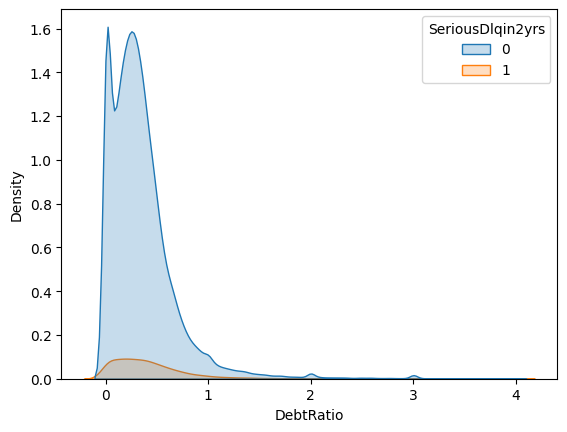

In [94]:
sns.kdeplot(data=df_clean, x="DebtRatio", hue="SeriousDlqin2yrs", shade=True)
plt.show()

#### Number of Dependents

In [85]:
df_clean["NumberOfDependents"].describe().reset_index()

,index,NumberOfDependents
0,count,119763.000000
1,mean,0.838247
2,std,1.142582
3,min,0.000000
4,25%,0.000000
5,50%,0.000000
6,75%,1.000000
7,max,20.000000


Text(0.5, 1.0, 'Distribution of NumberOfDependents')

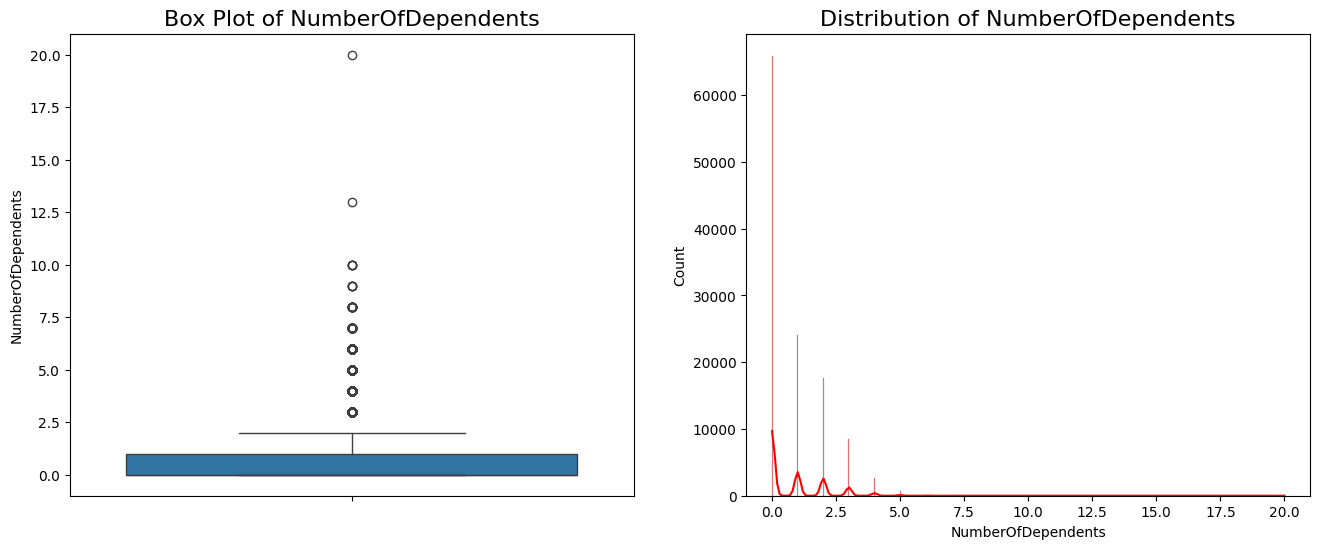

In [86]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['NumberOfDependents'], ax = axes[0])
axes[0].set_title('Box Plot of NumberOfDependents', size=16)
sns.histplot(df_clean['NumberOfDependents'], kde=True, color='red',ax=axes[1])
axes[1].set_title('Distribution of NumberOfDependents', size=16)

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_29151/96854659.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="NumberOfDependents", hue="SeriousDlqin2yrs", shade=True)


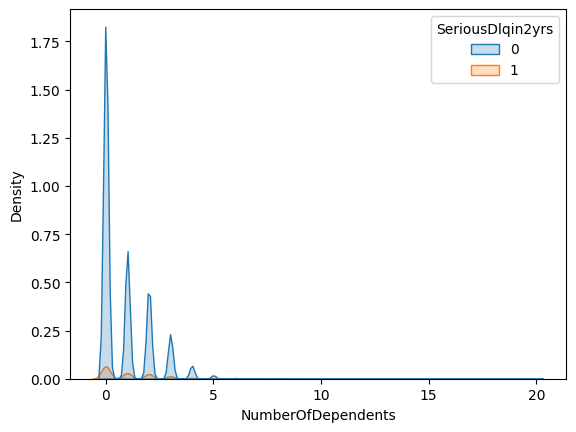

In [96]:
sns.kdeplot(data=df_clean, x="NumberOfDependents", hue="SeriousDlqin2yrs", shade=True)
plt.show()

#### Monthly Income

In [87]:
df_clean["MonthlyIncome"].describe().reset_index()

,index,MonthlyIncome
0,count,1.197630e+05
1,mean,6.776311e+03
2,std,1.438254e+04
3,min,0.000000e+00
4,25%,3.500000e+03
5,50%,5.483000e+03
6,75%,8.250000e+03
7,max,3.008750e+06


(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 [Text(-500000.0, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0'),
  Text(3500000.0, 0, '3.5')])

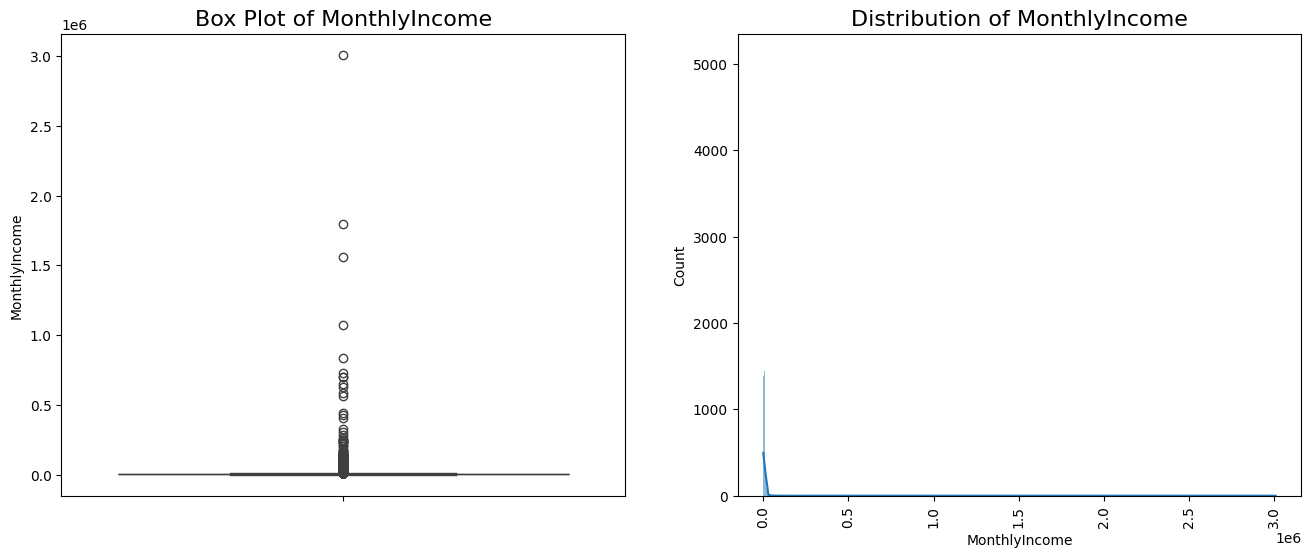

In [88]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['MonthlyIncome'], ax = axes[0])
axes[0].set_title('Box Plot of MonthlyIncome', size=16)
sns.histplot(df_clean['MonthlyIncome'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of MonthlyIncome', size=16)
plt.xticks(rotation=90)

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_29151/2659849236.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="MonthlyIncome", hue="SeriousDlqin2yrs", shade=True)


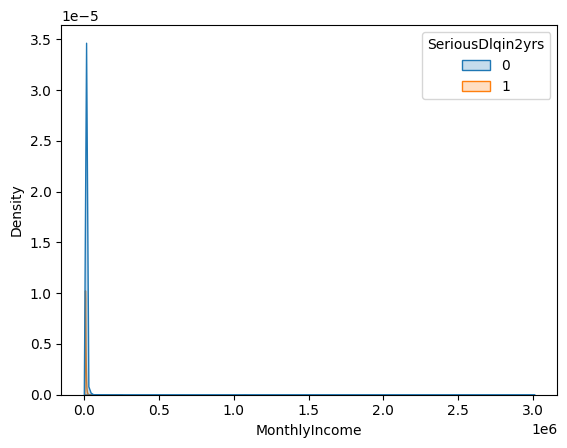

In [95]:
sns.kdeplot(data=df_clean, x="MonthlyIncome", hue="SeriousDlqin2yrs", shade=True)
plt.show()

#### NumberOfOpenCreditLinesAndLoans

In [89]:
df_clean["NumberOfOpenCreditLinesAndLoans"].describe().reset_index()

,index,NumberOfOpenCreditLinesAndLoans
0,count,119763.000000
1,mean,8.667452
2,std,5.202198
3,min,0.000000
4,25%,5.000000
5,50%,8.000000
6,75%,11.000000
7,max,57.000000


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

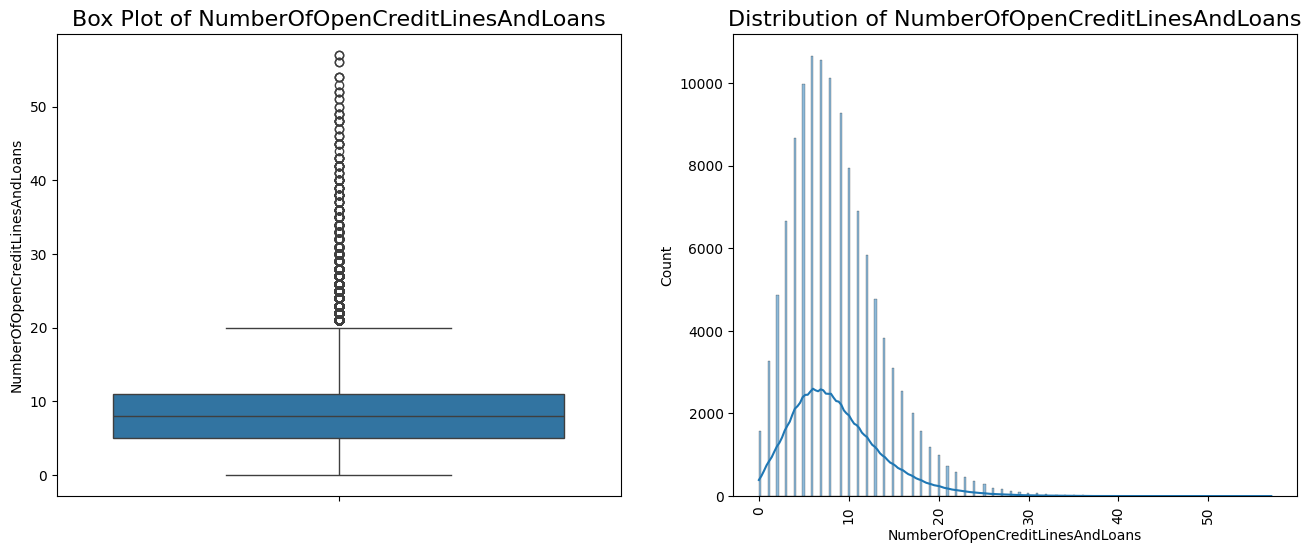

In [90]:
# NumberOfOpenCreditLinesAndLoans
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['NumberOfOpenCreditLinesAndLoans'], ax = axes[0])
axes[0].set_title('Box Plot of NumberOfOpenCreditLinesAndLoans', size=16)
sns.histplot(df_clean['NumberOfOpenCreditLinesAndLoans'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of NumberOfOpenCreditLinesAndLoans', size=16)
plt.xticks(rotation=90)

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_29151/258163363.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="NumberOfOpenCreditLinesAndLoans", hue="SeriousDlqin2yrs", shade=True)


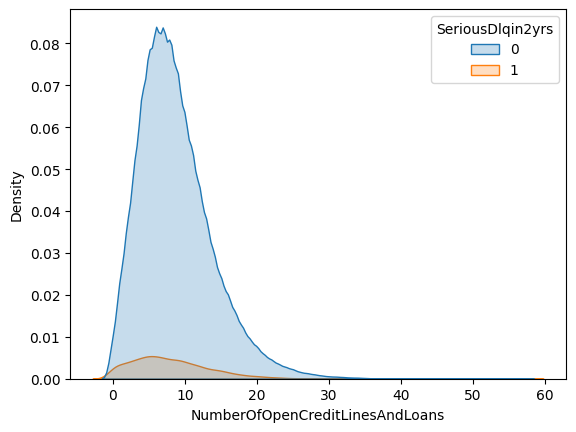

In [97]:
sns.kdeplot(data=df_clean, x="NumberOfOpenCreditLinesAndLoans", hue="SeriousDlqin2yrs", shade=True)
plt.show()

#### NumberRealEstateLoansOrLines

In [91]:
df_clean["NumberRealEstateLoansOrLines"].describe().reset_index()

,index,NumberRealEstateLoansOrLines
0,count,119763.000000
1,mean,1.036731
2,std,1.137502
3,min,0.000000
4,25%,0.000000
5,50%,1.000000
6,75%,2.000000
7,max,32.000000


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

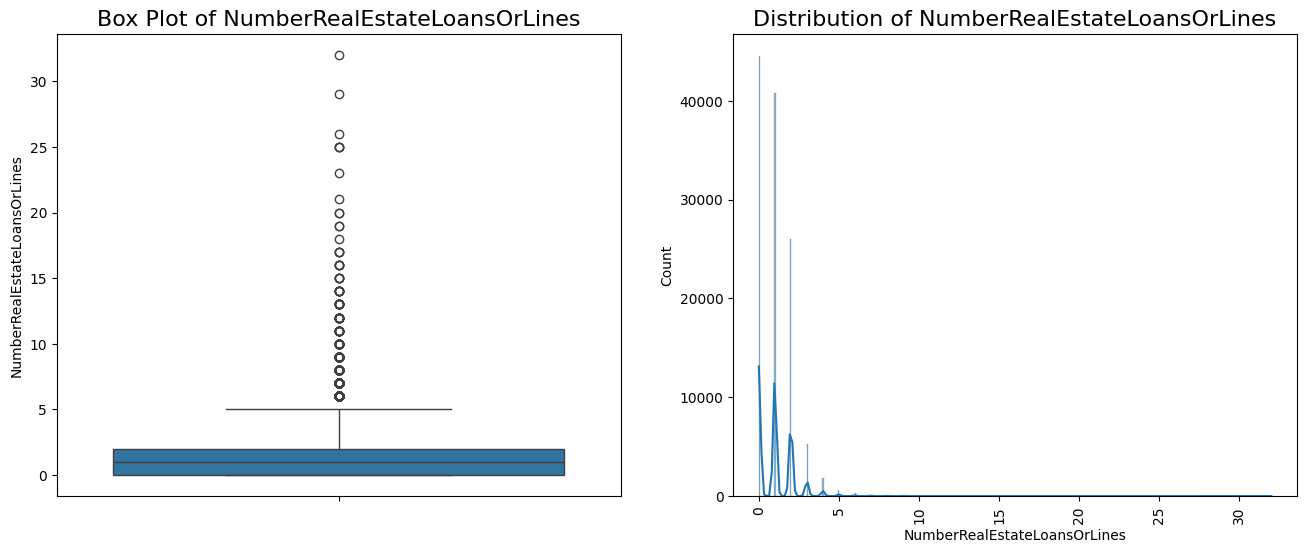

In [92]:
fig, axes = plt.subplots(1,2,figsize = (16, 6))
sns.boxplot(df_clean['NumberRealEstateLoansOrLines'], ax = axes[0])
axes[0].set_title('Box Plot of NumberRealEstateLoansOrLines', size=16)
sns.histplot(df_clean['NumberRealEstateLoansOrLines'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of NumberRealEstateLoansOrLines', size=16)
plt.xticks(rotation=90)

/var/folders/p6/3wdfvkxs655g3l5wdkh4kpv00000gn/T/ipykernel_29151/3622503507.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean, x="NumberRealEstateLoansOrLines", hue="SeriousDlqin2yrs", shade=True)


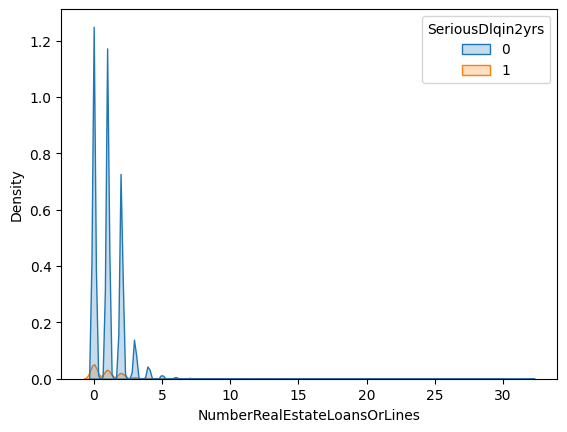

In [99]:
sns.kdeplot(data=df_clean, x="NumberRealEstateLoansOrLines", hue="SeriousDlqin2yrs", shade=True)
plt.show()

#### Focus on Target Variable : SeriousDlqin2yrs

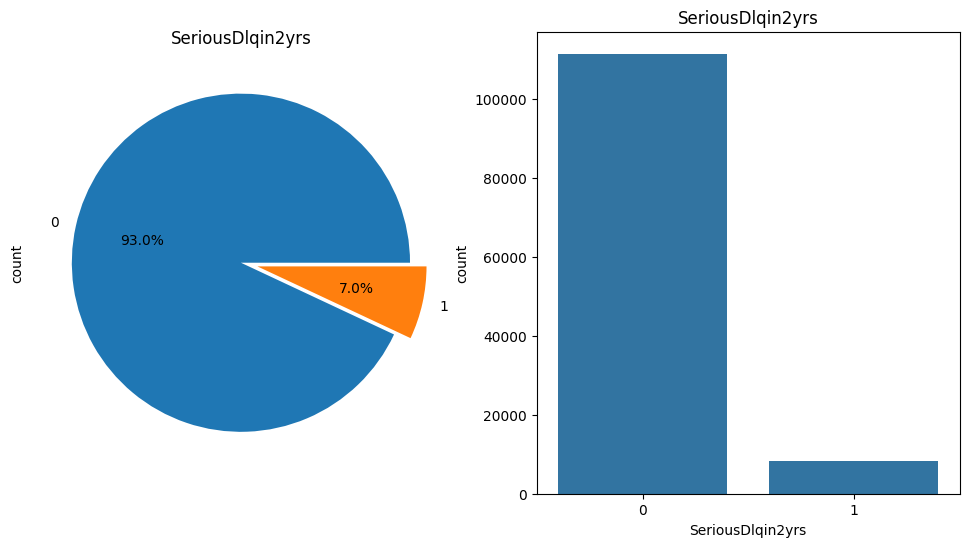

In [59]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
df_clean['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=axes[0])
axes[0].set_title('SeriousDlqin2yrs')
#ax[0].set_ylabel('')
sns.countplot(x = df_clean['SeriousDlqin2yrs'])
axes[1].set_title('SeriousDlqin2yrs')
plt.show()

#### Correlation

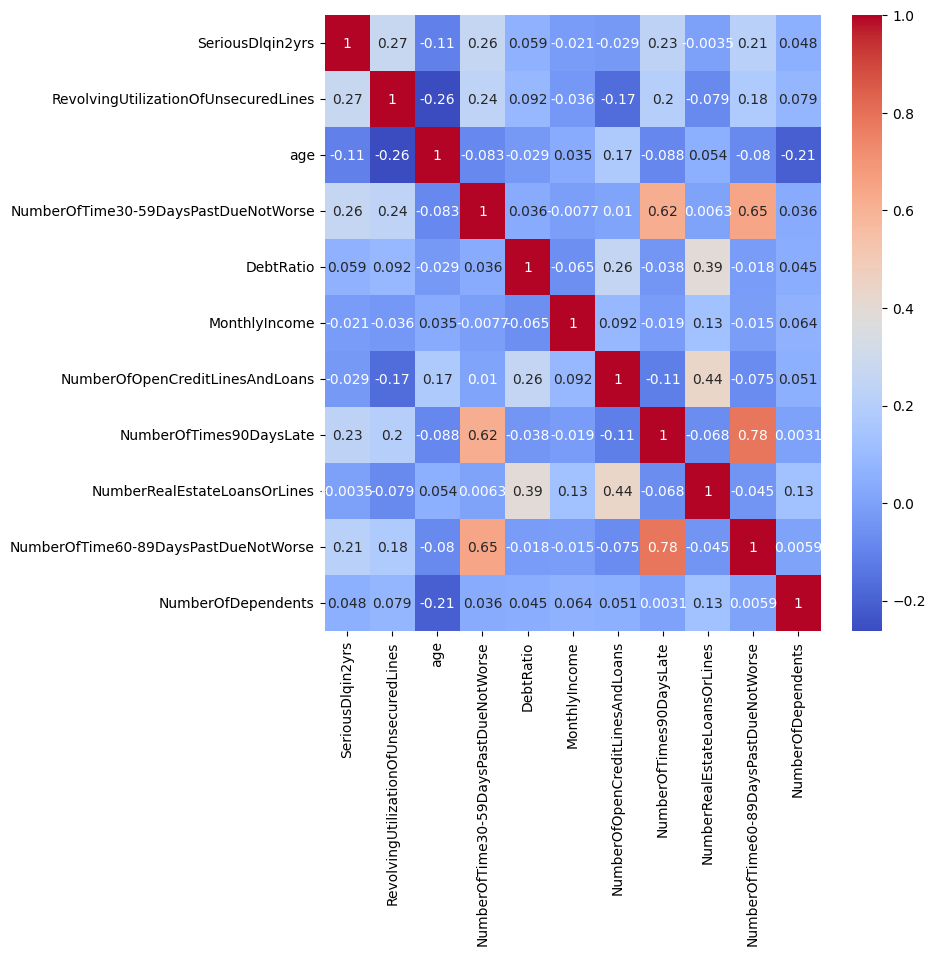

In [100]:
corr_matrix = df_clean.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()